<a href="https://colab.research.google.com/github/alen88925/py-test/blob/main/7112029051_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DNN

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 17s 10ms/step - loss: 0.2648 - accuracy: 0.9229 - val_loss: 0.1377 - val_accuracy: 0.9607
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1111 - accuracy: 0.9663 - val_loss: 0.1046 - val_accuracy: 0.9707
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0785 - accuracy: 0.9760 - val_loss: 0.1000 - val_accuracy: 0.9704
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0571 - accuracy: 0.9819 - val_loss: 0.0968 - val_accuracy: 0.9717
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0460 - accuracy: 0.9852 - val_loss: 0.0927 - val_accuracy: 0.9730
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0346 - accuracy: 0.9888 - val_loss: 0.0886 - val_accuracy: 0.9764
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step 

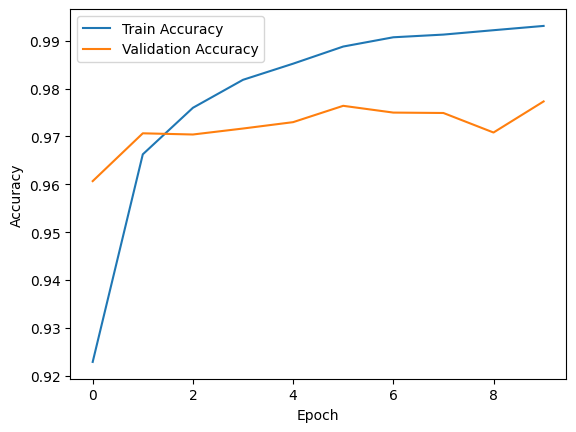

313/313 [==============================] - 1s 2ms/step
預測準確率： 0.9764


In [1]:
# 導入所需的庫
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# 加載MINST資料集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將圖片展平為一維數組
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# 對像素值進行標準化處理
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# 將目標變量進行One-Hot編碼
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 建立神經網絡模型
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 訓練模型
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# 顯示訓練過程中的準確率變化
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 使用模型進行預測
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 計算預測準確率
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("預測準確率：", accuracy)


#CNN

In [ ]:
# 導入所需的庫
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# 加載MINST資料集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 對像素值進行標準化處理
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# 將圖像數據轉換為四維數組（樣本數，高度，寬度，通道數）
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# 將目標變量進行One-Hot編碼
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 建立卷積神經網絡模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 訓練模型
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# 顯示訓練過程中的準確率變化
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 使用模型進行預測
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 計算預測準確率
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("預測準確率：", accuracy)
